<a href="https://colab.research.google.com/github/lokmanhaakim/study/blob/main/ProjectSSK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Price Catcher DOSM data catalogue (SSK 5251-1 Mini Project)**

Lokman Hakim Bin Muhamad (GS 65620)

Firstly the data is imported from _DOSM'S OFFICIAL OPEN DATA PORTAL_ (https://open.dosm.gov.my/data-catalogue) and specific to the 'price catcher 2022' catalog. The price is seperated for each month so we used to do for looping for combining the data for a year 2022.

In [ ]:
import pandas as pd

# Define an empty DataFrame to store the data
data = pd.DataFrame()

# Loop through months from 1 to 12 (range 1-13 for a year 2022)
for month in range(1, 13):
    # Format the month with leading zero if necessary
    month_str = str(month).zfill(2) #extract only the last digits of the year

    # Create the URL for each month
    url = f'https://storage.data.gov.my/pricecatcher/pricecatcher_2022-{month_str}.parquet'

    # Read data from URL
    data_month = pd.read_parquet(url)

    # Append data to the combined DataFrame
    data = data.append(data_month, ignore_index=True)

# Now combined_data contains information from all 12 months


<ipython-input-3-4a98ecb5fd7b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data_month, ignore_index=True)
<ipython-input-3-4a98ecb5fd7b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data_month, ignore_index=True)
<ipython-input-3-4a98ecb5fd7b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data_month, ignore_index=True)
<ipython-input-3-4a98ecb5fd7b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data_month, ignore_index=True)
<ipython-input-3-4a98ecb5fd7b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

We will display the whole dataset that has been imported to observe the outliers, empty data or other abnomaly patterns inside the dataset. We observe that the dataset contain a lot of _item_code_ and _premise_code_, so we decided to focus only to the **item 1(AYAM BERSIH STANDARD)** and 5 most frequent item in the dataset.

In [ ]:
data #display the data first

,date,premise_code,item_code,price
0,2022-01-01,2,1,9.10
1,2022-01-01,2,9,36.00
2,2022-01-01,2,14,24.00
3,2022-01-01,2,16,4.30
4,2022-01-01,2,18,4.50
...,...,...,...,...
27403978,2022-12-31,20861,1926,15.90
27403979,2022-12-31,20861,1928,7.50
27403980,2022-12-31,20861,1930,7.50
27403981,2022-12-31,20861,1943,14.60


In [ ]:
#set date as the index and view the dataframe
data.set_index('date')
data.head() #first 5 rows

,date,premise_code,item_code,price
0,2022-01-01,2,1,9.1
1,2022-01-01,2,9,36.0
2,2022-01-01,2,14,24.0
3,2022-01-01,2,16,4.3
4,2022-01-01,2,18,4.5


In [ ]:
data.tail() #5 last rows

,date,premise_code,item_code,price
27403978,2022-12-31,20861,1926,15.90
27403979,2022-12-31,20861,1928,7.50
27403980,2022-12-31,20861,1930,7.50
27403981,2022-12-31,20861,1943,14.60
27403982,2022-12-31,20861,1945,0.49


In [ ]:
#Filter data to focus only to the data number 1
Item_1 = data[data.item_code==1]
Item_1 #display the item 1

,date,premise_code,item_code,price
0,2022-01-01,2,1,9.10
932,2022-01-01,16,1,8.90
1152,2022-01-01,115,1,8.30
1386,2022-01-01,136,1,8.99
1611,2022-01-01,141,1,8.60
...,...,...,...,...
27403506,2022-12-31,20837,1,9.40
27403558,2022-12-31,20853,1,9.40
27403728,2022-12-31,20857,1,9.30
27403817,2022-12-31,20860,1,8.99


By focussing on to the item 1, a histogram plot is used to observe the item1's price distribution without specifying any premise code.

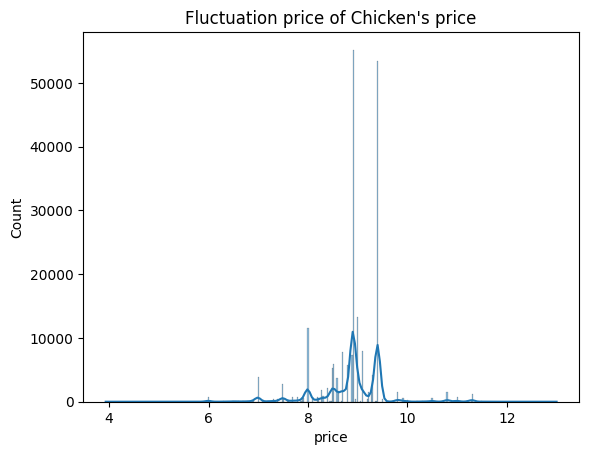

14824    48951
5274     48887
5137     46940
16353    46828
17940    46236
Name: premise_code, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
#plot the price for item in 1 without classifying the premise so that we can see the overall distribution of item 1's price in Malaysia
sn.histplot(Item_1, x="price", kde=True)
plt.title("Fluctuation price of Chicken's price")
plt.show()

#The result from the histogram shows that the price of chicken is vary for many types of premise, thus we filter it into 5 most frequent premise code
#extract 5 frequent premise_code
item_count = (data.premise_code).value_counts()
item_count5 = item_count[0:5]
item_count5

From the histogram above, we observe that the price for each premise code is not consistent, thus we need to remove the outliers for the further analysis (which focuses on to the 5 most frequent premise_code in the dataset). The most frequent dataset is extracted first. After that, we will use line plot to observe the price of item 1 for 5 premise code in the whole 2022.

14824
5274
5137
16353
17940


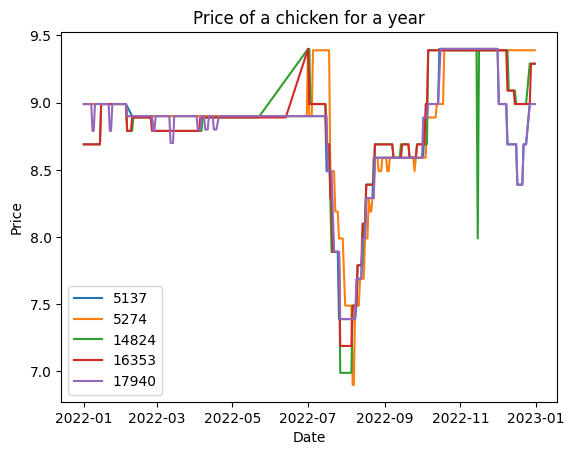

In [ ]:
#plot price for 5 different locations
for i in item_count5.index:
  print(i)
  barang1 = Item_1[Item_1.premise_code == i]
  plt.plot( barang1.date ,barang1.price )
  plt.xlabel("Date")
  plt.ylabel("Price")
  plt.title("Price of a chicken for a year")
  plt.legend(["5137","5274","14824" ,"16353", "17940"])
plt.show()

We will repeat the same process as before, which we will display item code for each premise code by using histogram. After that, we can conclude whether the data distribution is normal or not.

In [ ]:
Item_1.describe() #to observe the mean and standard deviation of item 1

,premise_code,item_code,price
count,215772.000000,215772.0,215772.000000
mean,10472.018218,1.0,8.895322
std,6992.519499,0.0,0.666169
min,-1.000000,1.0,3.930000
25%,3359.000000,1.0,8.690000
50%,11588.000000,1.0,8.900000
75%,17461.000000,1.0,9.390000
max,20861.000000,1.0,13.000000


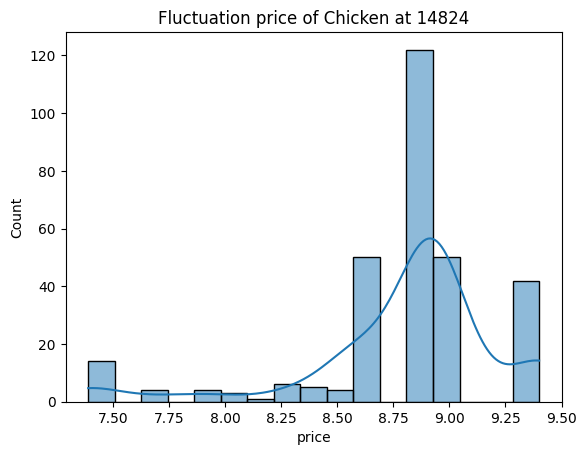

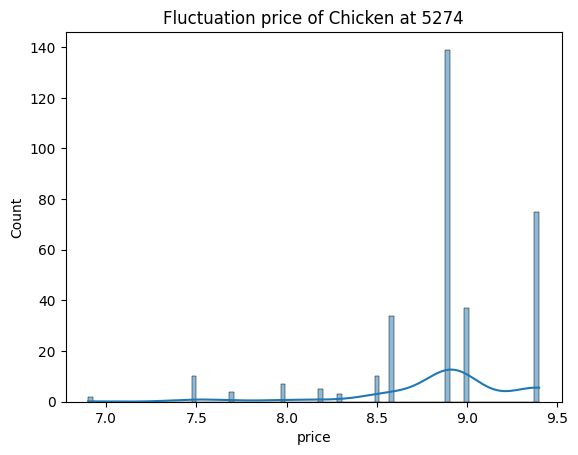

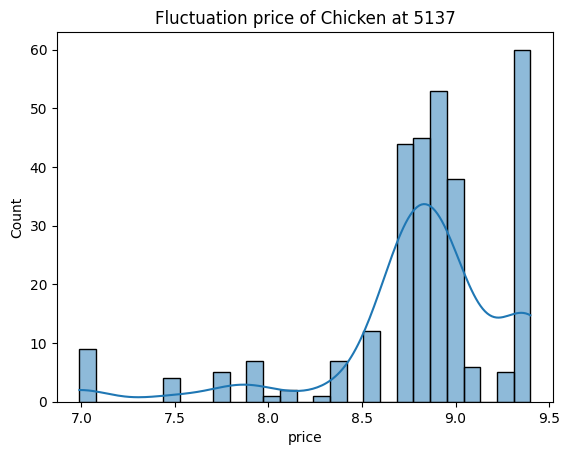

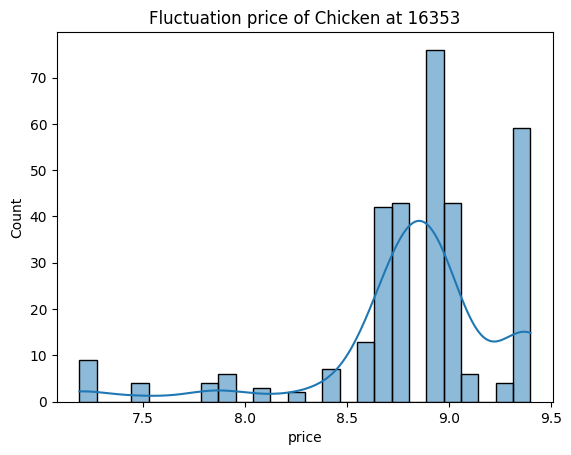

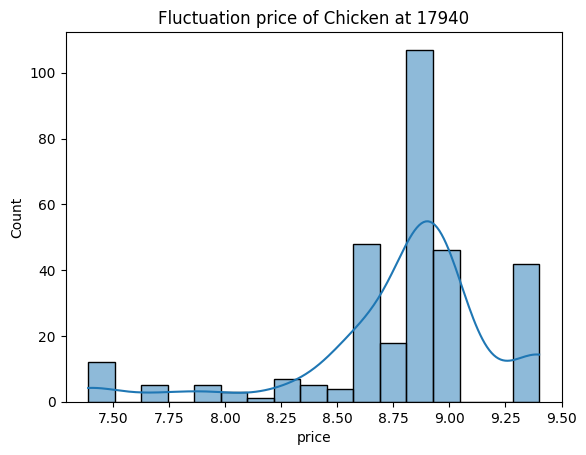

In [ ]:
#Plot price for each 5 premises
for i in item_count5.index:
  sn.histplot(data = Item_1[Item_1.premise_code == i] , x="price" , kde = True )
  plt.title(f"Fluctuation price of Chicken at {i}")
  plt.show()

After plot the histogram, we will use boxplot to detect the outliers and remove it after that.

In [ ]:
#t means temporary
Item_1_t = Item_1[(Item_1.premise_code == 14824) | (Item_1.premise_code == 5137) | (Item_1.premise_code == 5274) | (Item_1.premise_code == 16353) | (Item_1.premise_code == 17940)]
Item_1_t
Item_1_t.describe()


,premise_code,item_code,price
count,1554.000000,1554.0,1554.000000
mean,11880.141570,1.0,8.824337
std,5560.331505,0.0,0.461343
min,5137.000000,1.0,6.900000
25%,5274.000000,1.0,8.690000
50%,14824.000000,1.0,8.900000
75%,16353.000000,1.0,8.990000
max,17940.000000,1.0,9.400000


Text(0.5, 1.0, "Boxplot of Item 1's price")

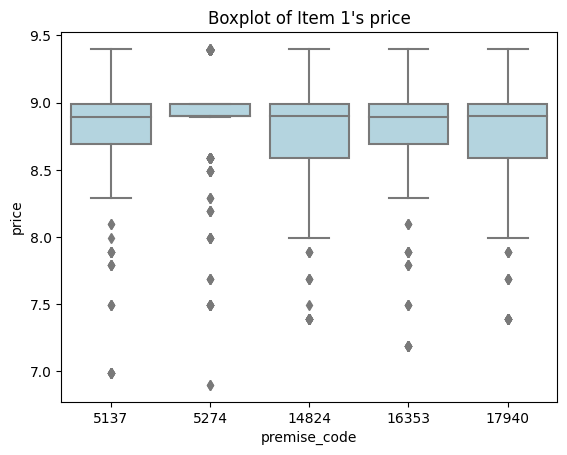

In [ ]:
# Observe the outlier for 5 premise code
b = sn.boxplot(data=Item_1_t,x="premise_code",y="price",color="lightblue")
plt.title("Boxplot of Item 1's price")

From the boxplot, we observe that premise_code contain the most outliers which indicate the differences of price along 2022 is too big showing that the price is not consistent.
<p>

Text(0.5, 1.0, "Boxplot of Item 1's price")

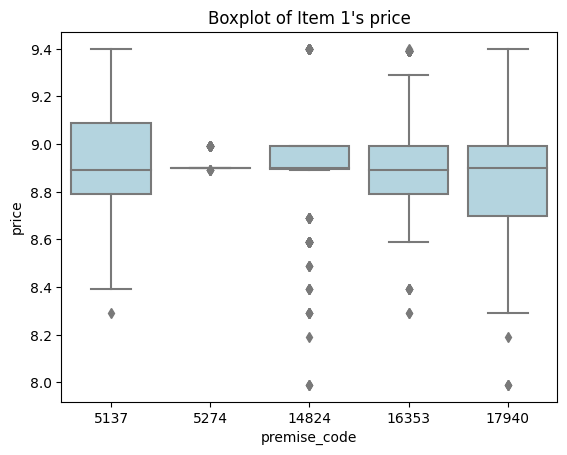

In [ ]:
from scipy import stats
Item_1_filter = []

def remove_out(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR

  dfnew = df[(df[column]>lower) & (df[column]<upper)]
  return dfnew

# Specify the column for which you want to remove outliers (e.g., 'price')
column_to_filter = 'price'

# # Set the threshold for Z-score (you can adjust this based on your requirements)
# zscore_threshold = 5

for i in range(0,5):
  Item_1_t = Item_1[(Item_1.premise_code == item_count5.index[i])]
  # Remove outliers using Z-score
  Item_1_t = remove_out(Item_1_t, column_to_filter)
  Item_1_filter.append(Item_1_t)

Item_1_filter = pd.concat([Item_1_filter[0], Item_1_filter[1], Item_1_filter[2],Item_1_filter[3],Item_1_filter[4]], ignore_index=True) #data after pre-processing
sn.boxplot(data=Item_1_filter,x="premise_code",y="price",color="lightblue")
plt.title("Boxplot of Item 1's price")

In [ ]:
#Measure the skewness and kurtosis
sdf=Item_1_filter['price'].skew()
kdf = Item_1_filter['price'].kurtosis()
print("Skewness : ",sdf,"\nKurtosis : ",kdf)

Skewness :  0.14300426822531676 
Kurtosis :  0.6768722363918074


We obtained malaysia's currency from the same website from DOSM but different data catalogue (https://open.dosm.gov.my/dashboard/exchange-rates) which focused on Malaysia's currency in 2022. Our hypothesis is that malaysia's currency and premise code does have correlation towards the item 1's price.

In [ ]:
# Arif , nanti kau baca data ni, filter untuk tahun 2022 sahaja then combine dengan data yang dah clean
import pandas as pd

#RM to USD
URL_DATAusd = 'https://storage.data.gov.my/finsector/exchangerates.parquet'

df2 = pd.read_parquet(URL_DATAusd)
if 'date' in df2.columns: df2['date'] = pd.to_datetime(df2['date'])

df2 = df2[(df2['date']>'2021-12-31') & (df2['date']<'2023-01-01')]
# df2 = df2['myr_usd']
# df2
df2= df2.loc[:,'date':'myr_usd']
df2

,date,myr_usd
6606,2022-01-01,0.239722
6607,2022-01-02,0.239722
6608,2022-01-03,0.239521
6609,2022-01-04,0.239808
6610,2022-01-05,0.239006
...,...,...
6966,2022-12-27,0.226244
6967,2022-12-28,0.226244
6968,2022-12-29,0.226244
6969,2022-12-30,0.227144


Text(0.5, 1.0, 'Malaysia currency for year 2022')

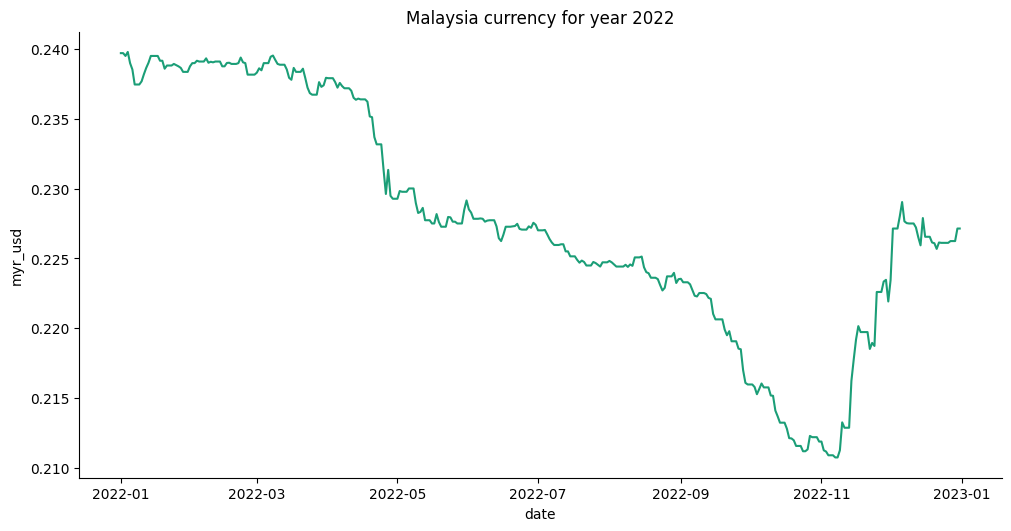

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['myr_usd']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('myr_usd')
plt.title("Malaysia currency for year 2022")

We combine first dataset with second dataset to observe the relationship between Malaysia's currency and item 1's price in 2022.

In [ ]:
df1 = Item_1_filter
df1

,date,premise_code,item_code,price
0,2022-01-01,14824,1,8.99
1,2022-01-02,14824,1,8.99
2,2022-01-03,14824,1,8.99
3,2022-01-04,14824,1,8.99
4,2022-01-05,14824,1,8.99
...,...,...,...,...
1301,2022-12-27,17940,1,8.99
1302,2022-12-28,17940,1,8.99
1303,2022-12-29,17940,1,8.99
1304,2022-12-30,17940,1,8.99


In [ ]:
df2 #combine df1 dengan df2

,date,myr_usd
6606,2022-01-01,0.239722
6607,2022-01-02,0.239722
6608,2022-01-03,0.239521
6609,2022-01-04,0.239808
6610,2022-01-05,0.239006
...,...,...
6966,2022-12-27,0.226244
6967,2022-12-28,0.226244
6968,2022-12-29,0.226244
6969,2022-12-30,0.227144


In [ ]:
v = df1.merge(df2[['date', 'myr_usd']])\
       .groupby(df1.columns.tolist())\
       .myr_usd\
       .apply(pd.Series.tolist)

df = pd.DataFrame(v.tolist(), index=v.index)\
       .rename(columns=lambda x: x + 1)\
       .add_prefix('myr_usd')\
       .reset_index()

df # Full dataset, now cari correlation antara price, premise_code and malaysia's currency(myr_usd1)

# df is the main Dataframe after combined and clean the data

,date,premise_code,item_code,price,myr_usd1
0,2022-01-01,5137,1,8.69,0.239722
1,2022-01-01,5274,1,8.99,0.239722
2,2022-01-01,14824,1,8.99,0.239722
3,2022-01-01,16353,1,8.69,0.239722
4,2022-01-01,17940,1,8.99,0.239722
...,...,...,...,...,...
1301,2022-12-30,17940,1,8.99,0.227144
1302,2022-12-31,5137,1,9.29,0.227144
1303,2022-12-31,14824,1,8.99,0.227144
1304,2022-12-31,16353,1,9.29,0.227144


<ipython-input-23-0881a9b1aa2b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrcoef = df.corr()


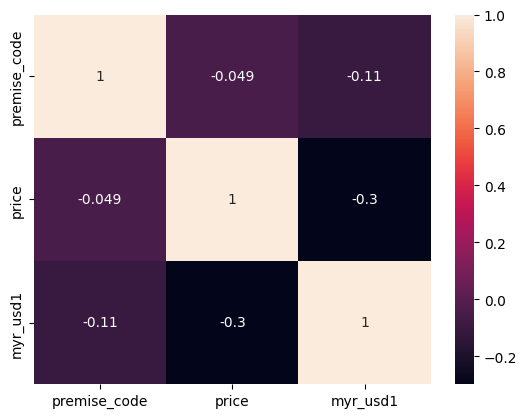

In [ ]:
df = df.drop('item_code', axis=1) #because of the item type in the datafram is same (which is 1), we eliminate item_code variable
corrcoef = df.corr()
sn.heatmap(corrcoef, annot=True)
plt.show()

In [ ]:
from scipy.stats import f_oneway

#Conduct the one-way ANOVA
f_oneway(df['price'],df['premise_code'],df['myr_usd1'])

F_onewayResult(statistic=1461676.0973660487, pvalue=0.0)

**BARU SAMPAI SINI**

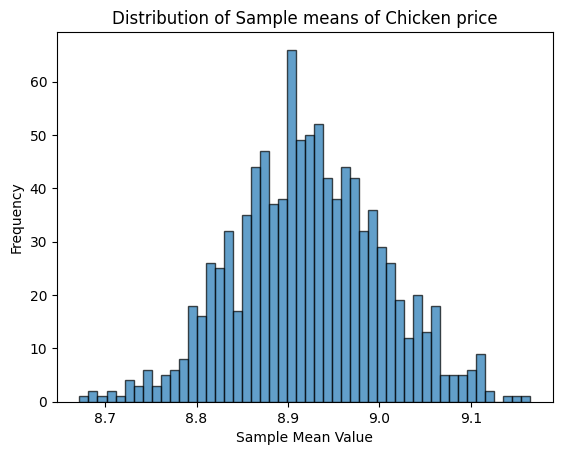

In [ ]:
#Sample mean distribution
sample_means = []
num_samples = 1000
sample_size = 10 # we can play with this number. as it increases, the result becomes more "normal"

for _ in range(num_samples):
  sample = np.random.choice(df1.price, sample_size)
  sample_means.append(np.mean(sample))

plt.hist(sample_means, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Sample means of Chicken price')
plt.xlabel('Sample Mean Value')
plt.ylabel('Frequency')
plt.show()


In [ ]:
print(df1[(df1.date<'2022-01-31') & (df1.date>'2022-01-01')])

           date  premise_code  item_code  price
1    2022-01-02         14824          1   8.99
2    2022-01-03         14824          1   8.99
3    2022-01-04         14824          1   8.99
4    2022-01-05         14824          1   8.99
5    2022-01-06         14824          1   8.99
...         ...           ...        ...    ...
1048 2022-01-26         17940          1   8.99
1049 2022-01-27         17940          1   8.99
1050 2022-01-28         17940          1   8.99
1051 2022-01-29         17940          1   8.99
1052 2022-01-30         17940          1   8.99

[135 rows x 4 columns]


Based on the random pick sample for item 1's price in the first month, **our hypothesis is that the price is RM 8.90.**

In [ ]:
#set null hypothesis , N0 = 8.9 based on the histogram
import scipy.stats as stats
t_stat, p_value = stats.ttest_1samp(sample,8.9)
#print the results
print("Test statistics: ",t_stat)
print("p-value ",p_value)

# Conclusion
if p_value < 0.05:
  print("Reject the null hypothesis.")
else:
  print("Fail to reject the null hypothesis.")


Test statistics:  -0.8587414348341968
p-value  0.4127694882136085
Fail to reject the null hypothesis.


In [ ]:
Item_2 = data[data.item_code==2]
Item_2 #display the item 1

,date,premise_code,item_code,price
176,2022-01-01,3,2,10.1
2441,2022-01-01,234,2,10.8
4317,2022-01-01,365,2,11.0
5321,2022-01-01,387,2,10.1
6649,2022-01-01,434,2,10.1
...,...,...,...,...
27397104,2022-12-31,20715,2,12.2
27397960,2022-12-31,20732,2,10.5
27403284,2022-12-31,20833,2,10.4
27403601,2022-12-31,20854,2,10.4


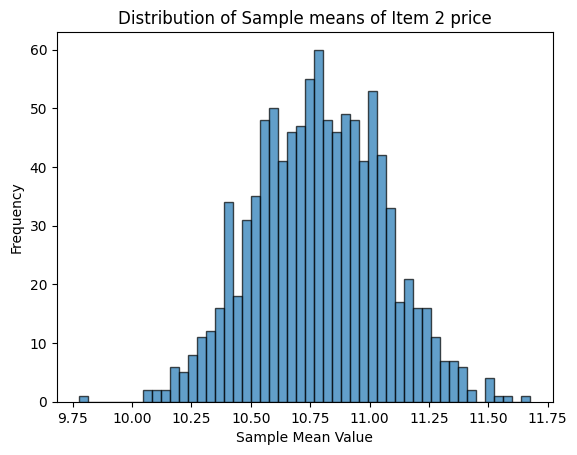

Test statistics:  -6.709749090055832
p-value  2.7232562975691685e-06
Reject the null hypothesis.


In [ ]:
#2nd Sample mean distribution
sample_means2 = []
num_samples = 1000
sample_size = 10 # we can play with this number. as it increases, the result becomes more "normal"

for _ in range(num_samples):
  sample2 = np.random.choice(Item_2.price, sample_size)
  sample_means2.append(np.mean(sample2))

# print(np.mean(sample))
plt.hist(sample_means2, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Sample means of Item 2 price')
plt.xlabel('Sample Mean Value')
plt.ylabel('Frequency')
plt.show()

#Ttest for both samples
t_stat2, p_value2 = stats.ttest_ind(sample, sample2) #T-test for both item 1 and 2
#print the results
print("Test statistics: ",t_stat2)
print("p-value ",p_value2)

#Conclusion
if p_value2 < 0.05:
  print("Reject the null hypothesis.")
else:
  print("Fail to reject the null hypothesis.")

**BARU SAMPAI SINI**

<function matplotlib.pyplot.show(close=None, block=None)>

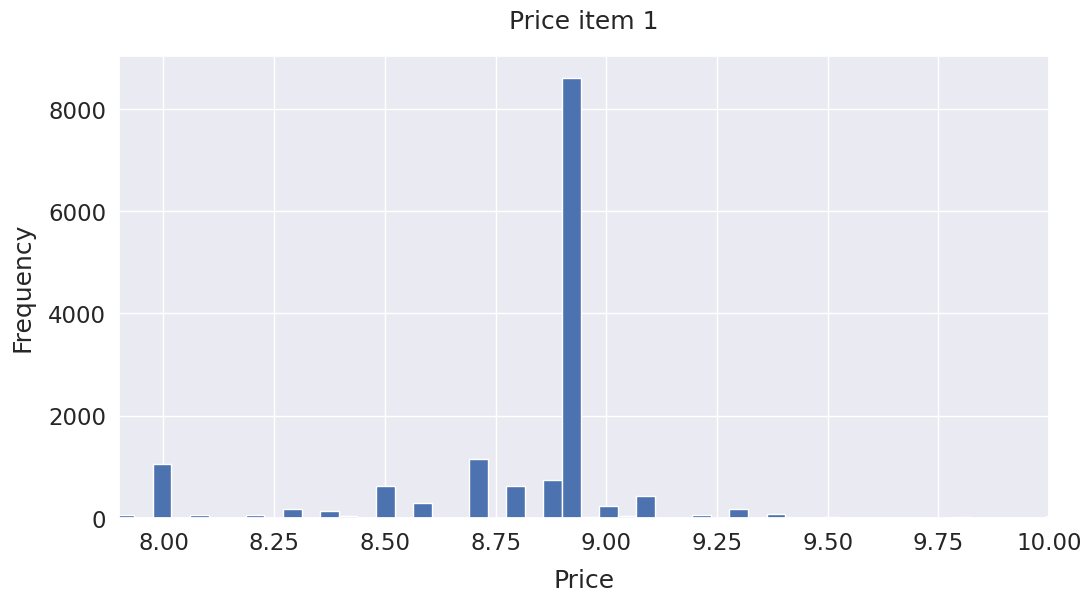

In [ ]:
#import data for the next month
URL_DATA2 = 'https://storage.data.gov.my/pricecatcher/pricecatcher_2022-02.parquet'

df2 = pd.read_parquet(URL_DATA2)
if 'date' in df2.columns: df2['date'] = pd.to_datetime(df2['date'])
df2 = df2.set_index('date')

df_2 = df2[df2['item_code']==i]

sn.set_theme(style='darkgrid',font_scale = 1.5,font="sans-serif")
plt.figure(figsize=(12,6))
plt.hist(df_2['price'],bins=100)
plt.title("Price item 1", pad = 20)
plt.xlabel("Price", labelpad=10)
plt.ylabel("Frequency", labelpad=10)
plt.xlim(7.9,10)
plt.show

In [ ]:
#Performing EDA on df
df.head(5)
df.tail(5)
df.dtypes
df.shape

(2454101, 3)

In [ ]:
row = len(df)

#fclassify each item in a table
df_1 = df[df['item_code']==1]
print(min(df_1['price']))

5.49


<function matplotlib.pyplot.show(close=None, block=None)>

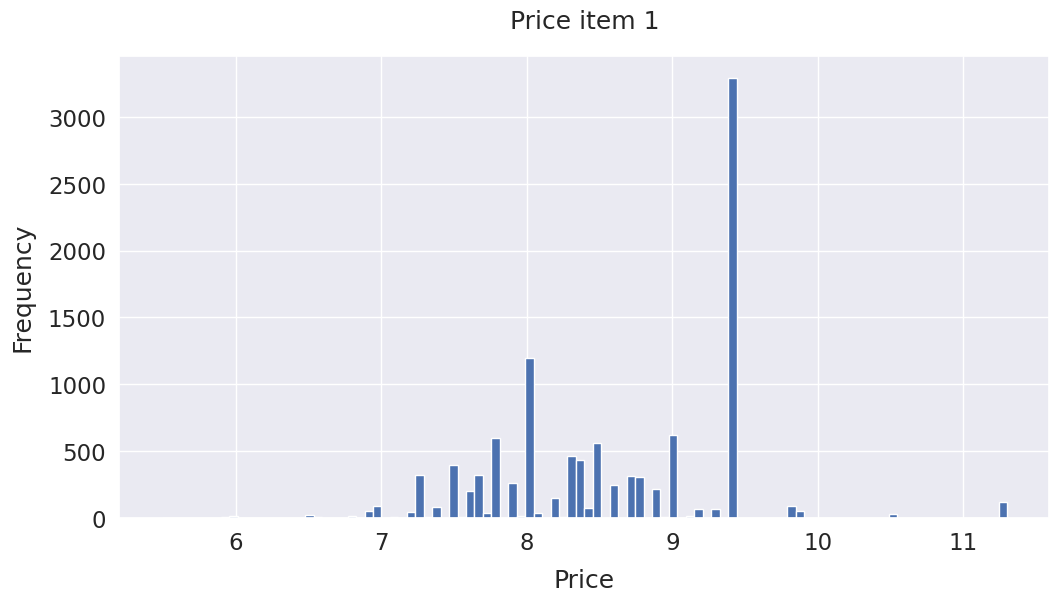

In [ ]:
#plot histogram

sn.set_theme(style='darkgrid',font_scale = 1.5,font="sans-serif")

plt.figure(figsize=(12,6))

plt.hist(df_1['price'],bins=100)

plt.title("Price item 1", pad = 20)
plt.xlabel("Price", labelpad=10)
plt.ylabel("Frequency", labelpad=10)
plt.show

In [ ]:
def unique(list1):
    unique_list = pd.Series(list1).drop_duplicates().tolist()
    return unique_list

m = unique(df['item_code'])

for x in m:
  print(x)


1


ValueError: ignored